# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 383 files belonging to 5 classes.
['Tobacco___AlternariaLeafSpot_Virus', 'Tobacco___Black_Shack', 'Tobacco___Healthy', 'Tobacco___Mosaic_Virus', 'Tobacco___Potato_Virus']


# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

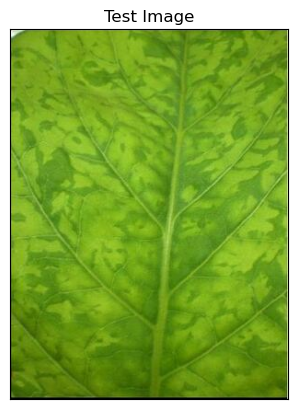

In [4]:
import cv2
import matplotlib.pyplot as plt

# Set the backend for image display
%matplotlib inline

image_path = 'test/test/TMV046.JPG'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 2s 2s/step


In [6]:
print(predictions)

[[0.01671873 0.00150708 0.00305141 0.76930773 0.209415  ]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


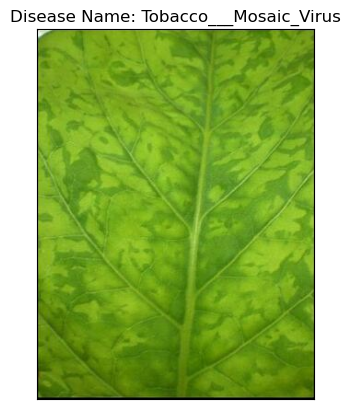

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()